<a href="https://colab.research.google.com/github/muhaseeb34/Data3001-Modelling-2/blob/main/DTree_noSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_data_product.csv to final_data_product (3).csv


In [ ]:
# === IMPORTS ===
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image, display

df = pd.read_csv("final_data_product.csv")
print("Original data shape:", df.shape)


Original data shape: (1032, 255)


In [ ]:
# === DATA CLEANING ===
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist", "BPS_CURRENTLAPTIMEINMS",
    "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS", "STS_CURRENTLAPTIMEINMS",
    "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS", "APX2_CURRENTLAPTIMEINMS"
]


data = df.drop(columns=DROPPED, errors='ignore').dropna().drop_duplicates()
data = data[data['invalid_lap'] == 0]
data = data[data['Target_CURRENTLAPTIMEINMS'] < 60000]

# === PREPARE FEATURES & TARGET ===
print("\n" + "="*50)
print("PREPARING FEATURES AND TARGET")
print("="*50)

# Define X and y
X = data.drop(columns=['lap_id', 'invalid_lap', 'Target_CURRENTLAPTIMEINMS'])
y = data['Target_CURRENTLAPTIMEINMS']

print(f"Original features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")
print(f"Target range: {y.min():.0f} to {y.max():.0f} ms")

# === COLUMN SELECTION (SPEED FEATURES REMOVED) ===
target_columns = [
    '_LAPDISTANCE', '_WORLDPOSITIONX', '_WORLDPOSITIONY',
    '_STEER', '_BRAKE', '_THROTTLE'
    # SPEED FEATURES REMOVED
]

selected_columns = [col for col in X.columns if col.endswith(tuple(target_columns))]
X = X[selected_columns]

print(f"\nAfter column selection (no speed features):")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")
print(f"Selected columns count: {len(selected_columns)}")
print(f"First 10 selected columns: {selected_columns[:10]}")


PREPARING FEATURES AND TARGET
Original features: 174
Samples: 313
Target range: 12204 to 57223 ms

After column selection (no speed features):
Features: 60, Samples: 313
Selected columns count: 60
First 10 selected columns: ['BPS_THROTTLE', 'BPS_STEER', 'BPS_BRAKE', 'BPS_LAPDISTANCE', 'BPS_WORLDPOSITIONX', 'BPS_WORLDPOSITIONY', 'BPS_ext_LAPDISTANCE', 'BPE_THROTTLE', 'BPE_STEER', 'BPE_BRAKE']


In [ ]:
# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === ORIGINAL TREE ===
print("\n" + "="*50)
print("TRAINING ORIGINAL TREE")
print("="*50)

dt_original = DecisionTreeRegressor(
    max_depth=5,
    random_state=42,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_original.fit(X_train, y_train)


TRAINING ORIGINAL TREE


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

In [ ]:
# Performance evaluation
y_train_pred_orig = dt_original.predict(X_train)
y_test_pred_orig = dt_original.predict(X_test)
train_rmse_orig = np.sqrt(mean_squared_error(y_train, y_train_pred_orig))
test_rmse_orig = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))
train_r2_orig = r2_score(y_train, y_train_pred_orig)
test_r2_orig = r2_score(y_test, y_test_pred_orig)

print("ORIGINAL TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_orig:.2f} ms")
print(f"Testing RMSE:  {test_rmse_orig:.2f} ms")
print(f"Training R²:   {train_r2_orig:.4f}")
print(f"Testing R²:    {test_r2_orig:.4f}")
print(f"Error %: {test_rmse_orig / y.mean() * 100:.2f}%")

ORIGINAL TREE PERFORMANCE:
Training RMSE: 2528.14 ms
Testing RMSE:  1138.61 ms
Training R²:   0.3725
Testing R²:    -0.3504
Error %: 8.48%


In [ ]:
# Feature importance
feature_importances_orig = dt_original.feature_importances_
importance_df_orig = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_orig
}).sort_values('importance', ascending=False)

print("\n=== ORIGINAL TREE - TOP FEATURES ===")
print(importance_df_orig.head(10))
non_zero_orig = (importance_df_orig['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_orig}")


=== ORIGINAL TREE - TOP FEATURES ===
                feature  importance
41         STE_THROTTLE    0.824774
30            STS_BRAKE    0.079064
49           APX1_STEER    0.044703
27  THE_ext_LAPDISTANCE    0.030395
13  BPE_ext_LAPDISTANCE    0.011198
38      STM_LAPDISTANCE    0.006575
1             BPS_STEER    0.003291
7          BPE_THROTTLE    0.000000
4    BPS_WORLDPOSITIONX    0.000000
5    BPS_WORLDPOSITIONY    0.000000
Features with non-zero importance: 7


In [ ]:
# Check if the problem is the speed removal
print("🔍 DIAGNOSING THE NEGATIVE R² ISSUE:")

# Baseline: How good is predicting the mean?
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
dummy_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
dummy_r2 = r2_score(y_test, y_pred_dummy)

print(f"Dummy Regressor (predict mean):")
print(f"  RMSE: {dummy_rmse:.2f} ms")
print(f"  R²:   {dummy_r2:.4f}")

print(f"\nYour Original Tree:")
print(f"  RMSE: {test_rmse_orig:.2f} ms (should be < {dummy_rmse:.2f} ms)")
print(f"  R²:   {test_r2_orig:.4f} (should be > {dummy_r2:.4f})")

if test_rmse_orig > dummy_rmse:
    print("🚨 CONFIRMED: Your model is worse than predicting the average lap time!")

🔍 DIAGNOSING THE NEGATIVE R² ISSUE:
Dummy Regressor (predict mean):
  RMSE: 1070.35 ms
  R²:   -0.1933

Your Original Tree:
  RMSE: 1138.61 ms (should be < 1070.35 ms)
  R²:   -0.3504 (should be > -0.1933)
🚨 CONFIRMED: Your model is worse than predicting the average lap time!


In [ ]:
# === COMPLEX TREE (YOUR MANUAL PARAMETERS) ===
print("\n" + "="*50)
print("TRAINING COMPLEX TREE")
print("="*50)

dt_complex = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_complex.fit(X_train, y_train)


TRAINING COMPLEX TREE


DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
# Performance evaluation
y_train_pred_comp = dt_complex.predict(X_train)
y_test_pred_comp = dt_complex.predict(X_test)
train_rmse_comp = np.sqrt(mean_squared_error(y_train, y_train_pred_comp))
test_rmse_comp = np.sqrt(mean_squared_error(y_test, y_test_pred_comp))
train_r2_comp = r2_score(y_train, y_train_pred_comp)
test_r2_comp = r2_score(y_test, y_test_pred_comp)

print("COMPLEX TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_comp:.2f} ms")
print(f"Testing RMSE:  {test_rmse_comp:.2f} ms")
print(f"Training R²:   {train_r2_comp:.4f}")
print(f"Testing R²:    {test_r2_comp:.4f}")
print(f"Error %: {test_rmse_comp / y.mean() * 100:.2f}%")

COMPLEX TREE PERFORMANCE:
Training RMSE: 2181.28 ms
Testing RMSE:  1100.19 ms
Training R²:   0.5329
Testing R²:    -0.2608
Error %: 8.19%


In [ ]:
# Feature importance
feature_importances_comp = dt_complex.feature_importances_
importance_df_comp = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_comp
}).sort_values('importance', ascending=False)

print("\n=== COMPLEX TREE - TOP FEATURES ===")
print(importance_df_comp.head(10))
non_zero_comp = (importance_df_comp['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_comp}")



=== COMPLEX TREE - TOP FEATURES ===
                feature  importance
41         STE_THROTTLE    0.582259
15            THS_STEER    0.252675
6   BPS_ext_LAPDISTANCE    0.069481
35         STM_THROTTLE    0.030502
25   THE_WORLDPOSITIONX    0.014365
48        APX1_THROTTLE    0.013701
21         THE_THROTTLE    0.010773
19   THS_WORLDPOSITIONY    0.007859
26   THE_WORLDPOSITIONY    0.004405
33   STS_WORLDPOSITIONY    0.002868
Features with non-zero importance: 29


In [ ]:
# === GRIDSEARCHCV OPTIMIZATION ===
print("\n" + "="*60)
print("PERFORMING GRIDSEARCHCV FOR OPTIMAL PARAMETERS")
print("="*60)

# Standard parameter grid
param_grid = {
    'max_depth': [5, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Searching for optimal parameters...")
grid_search.fit(X_train, y_train)

dt_gridsearch = grid_search.best_estimator_
best_params_grid = grid_search.best_params_

print(f"\n🎯 GRIDSEARCH PARAMETERS FOUND:")
for param, value in best_params_grid.items():
    print(f"  {param}: {value}")

# Performance evaluation for GridSearch
y_train_pred_grid = dt_gridsearch.predict(X_train)
y_test_pred_grid = dt_gridsearch.predict(X_test)
train_rmse_grid = np.sqrt(mean_squared_error(y_train, y_train_pred_grid))
test_rmse_grid = np.sqrt(mean_squared_error(y_test, y_test_pred_grid))
train_r2_grid = r2_score(y_train, y_train_pred_grid)
test_r2_grid = r2_score(y_test, y_test_pred_grid)

print("GRIDSEARCH TREE PERFORMANCE:")
print(f"Training RMSE: {train_rmse_grid:.2f} ms")
print(f"Testing RMSE:  {test_rmse_grid:.2f} ms")
print(f"Training R²:   {train_r2_grid:.4f}")
print(f"Testing R²:    {test_r2_grid:.4f}")
print(f"Error %: {test_rmse_grid / y.mean() * 100:.2f}%")


PERFORMING GRIDSEARCHCV FOR OPTIMAL PARAMETERS
Searching for optimal parameters...
Fitting 3 folds for each of 80 candidates, totalling 240 fits

🎯 GRIDSEARCH PARAMETERS FOUND:
  max_depth: 5
  min_samples_leaf: 2
  min_samples_split: 15
GRIDSEARCH TREE PERFORMANCE:
Training RMSE: 1884.60 ms
Testing RMSE:  1553.73 ms
Training R²:   0.6513
Testing R²:    -1.5145
Error %: 11.57%


In [ ]:
# === MODEL COMPARISON ===
print("\n" + "="*60)
print("COMPARING ALL THREE MODELS")
print("="*60)

print(f"{'Model':<20} {'Test RMSE':<12} {'Test R²':<10} {'Overfit Gap':<12}")
print("-" * 60)
print(f"{'Original Tree':<20} {test_rmse_orig:<12.2f} {test_r2_orig:<10.4f} {train_r2_orig-test_r2_orig:<12.4f}")
print(f"{'Complex Tree':<20} {test_rmse_comp:<12.2f} {test_r2_comp:<10.4f} {train_r2_comp-test_r2_comp:<12.4f}")
print(f"{'GridSearch Tree':<20} {test_rmse_grid:<12.2f} {test_r2_grid:<10.4f} {train_r2_grid-test_r2_grid:<12.4f}")


COMPARING ALL THREE MODELS
Model                Test RMSE    Test R²    Overfit Gap 
------------------------------------------------------------
Original Tree        1138.61      -0.3504    0.7229      
Complex Tree         1100.19      -0.2608    0.7937      
GridSearch Tree      1553.73      -1.5145    2.1658      


In [ ]:
# === QUICK TEST WITH SPEED FEATURES ===
print("\n" + "="*60)
print("QUICK TEST: WITH vs WITHOUT SPEED FEATURES")
print("="*60)

# Test with all speed features temporarily
speed_columns = [col for col in data.columns if 'SPEED' in col and col in data.columns]
non_speed_columns = [col for col in X.columns if 'SPEED' not in col]

print(f"Speed features available: {len(speed_columns)}")
print(f"Non-speed features: {len(non_speed_columns)}")

# Test a simple model with speed features
X_speed_test = data[speed_columns[:10]]  # Use first 10 speed features
X_train_speed, X_test_speed, y_train_speed, y_test_speed = train_test_split(X_speed_test, y, test_size=0.2, random_state=42)

dt_speed_test = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_speed_test.fit(X_train_speed, y_train_speed)
y_pred_speed = dt_speed_test.predict(X_test_speed)
r2_speed = r2_score(y_test_speed, y_pred_speed)

print(f"Model with ONLY speed features: R² = {r2_speed:.4f}")
print(f"Model with NO speed features: R² = {test_r2_orig:.4f}")

if r2_speed > test_r2_orig:
    print("🎯 CONFIRMED: Speed features are essential for prediction!")


QUICK TEST: WITH vs WITHOUT SPEED FEATURES
Speed features available: 9
Non-speed features: 60
Model with ONLY speed features: R² = 0.6591
Model with NO speed features: R² = -0.3504
🎯 CONFIRMED: Speed features are essential for prediction!


In [ ]:
# Determine the best model based on TEST R²
models_r2 = {
    'Original_Tree': test_r2_orig,
    'Complex_Tree': test_r2_comp,
    'GridSearch_Tree': test_r2_grid
}
best_model_name = max(models_r2, key=models_r2.get)
best_model_r2 = models_r2[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name} (Test R² = {best_model_r2:.4f})")


🏆 BEST MODEL: Complex_Tree (Test R² = -0.2608)


In [ ]:
# Assign the best model
if best_model_name == 'Original_Tree':
    dt_best = dt_original
elif best_model_name == 'Complex_Tree':
    dt_best = dt_complex
else:
    dt_best = dt_gridsearch

print(f"Using {best_model_name} for optimal setup prediction")

Using Complex_Tree for optimal setup prediction


In [ ]:
# === FEATURE IMPORTANCE WITH BEST MODEL ===
print("\n" + "="*50)
print(f"FEATURE IMPORTANCE WITH {best_model_name}")
print("="*50)

feature_importances_best = dt_best.feature_importances_
importance_df_best = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances_best
}).sort_values('importance', ascending=False)

print(f"\n=== {best_model_name} - TOP 20 FEATURES ===")
print(importance_df_best.head(20))

non_zero_best = (importance_df_best['importance'] > 0).sum()
print(f"Features with non-zero importance: {non_zero_best}")


FEATURE IMPORTANCE WITH Complex_Tree

=== Complex_Tree - TOP 20 FEATURES ===
                feature  importance
41         STE_THROTTLE    0.582259
15            THS_STEER    0.252675
6   BPS_ext_LAPDISTANCE    0.069481
35         STM_THROTTLE    0.030502
25   THE_WORLDPOSITIONX    0.014365
48        APX1_THROTTLE    0.013701
21         THE_THROTTLE    0.010773
19   THS_WORLDPOSITIONY    0.007859
26   THE_WORLDPOSITIONY    0.004405
33   STS_WORLDPOSITIONY    0.002868
3       BPS_LAPDISTANCE    0.002410
59  APX2_WORLDPOSITIONY    0.001703
13  BPE_ext_LAPDISTANCE    0.001586
20  THS_ext_LAPDISTANCE    0.001173
12   BPE_WORLDPOSITIONY    0.000920
47  STE_ext_LAPDISTANCE    0.000842
10      BPE_LAPDISTANCE    0.000508
16            THS_BRAKE    0.000358
46   STE_WORLDPOSITIONY    0.000342
55           APX2_STEER    0.000308
Features with non-zero importance: 29


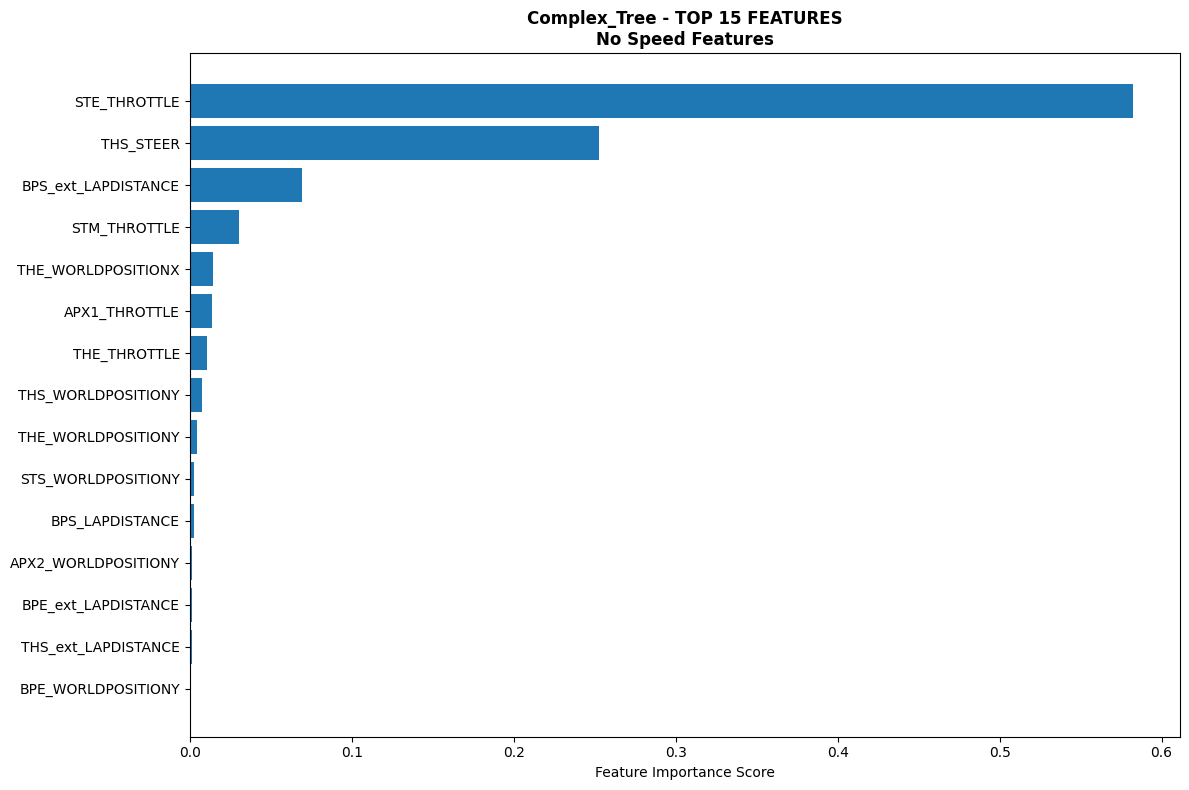

In [ ]:
# Visualization of feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df_best.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance Score')
plt.title(f'{best_model_name} - TOP 15 FEATURES\nNo Speed Features', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# === OPTIMAL SETUP PREDICTION ===
print("\n" + "="*70)
print("FINAL STEP: FINDING OPTIMAL RACING SETUP (NO SPEED FEATURES)")
print("="*70)

# Use the best model
your_decision_tree_model = dt_best

print(f"🔍 Using {best_model_name} to find optimal driver inputs")
print("   Focus: Steering, Braking, Throttle, Positioning (Speed features excluded)")

percentiles = (0.000001, 0.95)
bounds = {f: (data[f].quantile(percentiles[0]), data[f].quantile(percentiles[1])) for f in X.columns}

rng = np.random.default_rng(42)
N = 50_000
candidates = {f: rng.uniform(low=b[0], high=b[1], size=N) for f, b in bounds.items()}
Xcand = pd.DataFrame(candidates)[X.columns]

ycand = your_decision_tree_model.predict(Xcand)

imin = int(np.argmin(ycand))
best_combo = Xcand.iloc[imin].to_dict()
best_pred = ycand[imin]

print(f"\n🎯 OPTIMAL SETUP FOUND (searching {N:,} combinations)")
print(f"🏎️  Predicted Best Lap Time: {best_pred:,.0f} ms")
print(f"📊 Compared to average: {y.mean():,.0f} ms ({(y.mean()-best_pred)/y.mean()*100:.1f}% faster)")

# === SHOW ALL VARIABLES ===
print("\n" + "="*70)
print("OPTIMAL VALUES FOR ALL VARIABLES")
print("="*70)

# Group variables by type for better organization
steering_vars = [col for col in best_combo.keys() if 'STEER' in col]
brake_vars = [col for col in best_combo.keys() if 'BRAKE' in col]
throttle_vars = [col for col in best_combo.keys() if 'THROTTLE' in col]
position_vars = [col for col in best_combo.keys() if any(x in col for x in ['POSITION', 'LAPDISTANCE'])]
other_vars = [col for col in best_combo.keys() if col not in steering_vars + brake_vars + throttle_vars + position_vars]

# Display all variables in organized groups
print(f"\n🎮 STEERING VARIABLES ({len(steering_vars)}):")
for var in sorted(steering_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")

print(f"\n🛑 BRAKE VARIABLES ({len(brake_vars)}):")
for var in sorted(brake_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")

print(f"\n🚀 THROTTLE VARIABLES ({len(throttle_vars)}):")
for var in sorted(throttle_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")

print(f"\n📍 POSITION VARIABLES ({len(position_vars)}):")
for var in sorted(position_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")

print(f"\n📊 OTHER VARIABLES ({len(other_vars)}):")
for var in sorted(other_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")

# === SUMMARY STATISTICS ===
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"Total variables optimized: {len(best_combo)}")
print(f"Best predicted lap time: {best_pred:,.0f} ms")
print(f"Improvement over average: {(y.mean()-best_pred)/y.mean()*100:.1f}%")
print(f"Training data range: {y.min():,.0f} - {y.max():,.0f} ms")

# Show feature importance context
print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES IN THIS OPTIMAL SETUP:")
feature_importances = your_decision_tree_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(importance_df.head(10).iterrows()):
    optimal_value = best_combo.get(row['feature'], 'N/A')
    print(f"  {i+1:2d}. {row['feature']:<35} {optimal_value:>15,.4f} (importance: {row['importance']:.4f})")


FINAL STEP: FINDING OPTIMAL RACING SETUP (NO SPEED FEATURES)
🔍 Using Complex_Tree to find optimal driver inputs
   Focus: Steering, Braking, Throttle, Positioning (Speed features excluded)

🎯 OPTIMAL SETUP FOUND (searching 50,000 combinations)
🏎️  Predicted Best Lap Time: 12,284 ms
📊 Compared to average: 13,428 ms (8.5% faster)

OPTIMAL VALUES FOR ALL VARIABLES

🎮 STEERING VARIABLES (9):
  APX1_STEER                                        0.5723
  APX2_STEER                                       -0.1491
  BPE_STEER                                         0.1748
  BPS_STEER                                        -0.2993
  STE_STEER                                        -0.0078
  STM_STEER                                        -0.0028
  STS_STEER                                        -0.0063
  THE_STEER                                         0.5641
  THS_STEER                                        -0.0948

🛑 BRAKE VARIABLES (9):
  APX1_BRAKE                                        0

In [ ]:
# === OPTIMAL SETUP PREDICTION WITH TRACK BOUNDS ===
print("\n" + "="*70)
print("FINAL STEP: FINDING OPTIMAL RACING SETUP WITH TRACK CONSTRAINTS")
print("="*70)

# Use the best model
your_decision_tree_model = dt_best

print(f"🔍 Using {best_model_name} to find optimal driver inputs")
print("   Focus: Steering, Braking, Throttle, Positioning (Speed features excluded)")
print("   🛣️  Applying track boundary constraints to position variables")

# Define track-specific bounds for position variables
def get_track_constrained_bounds():
    bounds = {}

    # Get the original bounds for non-position variables
    percentiles = (0.000001, 0.95)
    for f in X.columns:
        if any(pos_keyword in f for pos_keyword in ['POSITIONX', 'POSITIONY', 'WORLDPOSITIONX', 'WORLDPOSITIONY']):
            # Use tighter bounds for position variables (5th to 95th percentile)
            bounds[f] = (data[f].quantile(0.05), data[f].quantile(0.95))
            print(f"  🛣️  Constrained {f}: {bounds[f][0]:.1f} to {bounds[f][1]:.1f}")
        else:
            # Use original bounds for other variables
            bounds[f] = (data[f].quantile(percentiles[0]), data[f].quantile(percentiles[1]))

    return bounds

# Get constrained bounds
bounds = get_track_constrained_bounds()

rng = np.random.default_rng(42)
N = 50_000
candidates = {f: rng.uniform(low=b[0], high=b[1], size=N) for f, b in bounds.items()}
Xcand = pd.DataFrame(candidates)[X.columns]

ycand = your_decision_tree_model.predict(Xcand)

imin = int(np.argmin(ycand))
best_combo = Xcand.iloc[imin].to_dict()
best_pred = ycand[imin]

print(f"\n🎯 OPTIMAL SETUP FOUND (searching {N:,} combinations)")
print(f"🏎️  Predicted Best Lap Time: {best_pred:,.0f} ms")
print(f"📊 Compared to average: {y.mean():,.0f} ms ({(y.mean()-best_pred)/y.mean()*100:.1f}% faster)")

# === SHOW ALL VARIABLES ===
print("\n" + "="*70)
print("OPTIMAL VALUES FOR ALL VARIABLES (WITH TRACK CONSTRAINTS)")
print("="*70)

# Display position variables first to verify they're reasonable
position_vars = [col for col in best_combo.keys() if any(pos_keyword in col for pos_keyword in ['POSITIONX', 'POSITIONY', 'WORLDPOSITIONX', 'WORLDPOSITIONY'])]

print(f"\n📍 POSITION VARIABLES ({len(position_vars)}):")
for var in sorted(position_vars):
    optimal_value = best_combo[var]
    # Show bounds for reference
    var_bounds = bounds.get(var, (0, 0))
    print(f"  {var:<40} {optimal_value:>15,.4f} (bounds: {var_bounds[0]:.1f} to {var_bounds[1]:.1f})")

# Show other variables
other_vars = [col for col in best_combo.keys() if col not in position_vars]

print(f"\n🎮 DRIVER INPUT VARIABLES ({len(other_vars)}):")
for var in sorted(other_vars):
    print(f"  {var:<40} {best_combo[var]:>15,.4f}")


FINAL STEP: FINDING OPTIMAL RACING SETUP WITH TRACK CONSTRAINTS
🔍 Using Complex_Tree to find optimal driver inputs
   Focus: Steering, Braking, Throttle, Positioning (Speed features excluded)
   🛣️  Applying track boundary constraints to position variables
  🛣️  Constrained BPS_WORLDPOSITIONX: 247.8 to 317.9
  🛣️  Constrained BPS_WORLDPOSITIONY: 270.4 to 336.6
  🛣️  Constrained BPE_WORLDPOSITIONX: 312.1 to 375.7
  🛣️  Constrained BPE_WORLDPOSITIONY: 196.2 to 275.4
  🛣️  Constrained THS_WORLDPOSITIONX: 232.9 to 315.5
  🛣️  Constrained THS_WORLDPOSITIONY: 272.8 to 348.8
  🛣️  Constrained THE_WORLDPOSITIONX: 339.5 to 378.5
  🛣️  Constrained THE_WORLDPOSITIONY: 177.7 to 247.5
  🛣️  Constrained STS_WORLDPOSITIONX: 310.9 to 359.6
  🛣️  Constrained STS_WORLDPOSITIONY: 223.2 to 275.5
  🛣️  Constrained STM_WORLDPOSITIONX: 372.7 to 378.5
  🛣️  Constrained STM_WORLDPOSITIONY: 149.6 to 181.8
  🛣️  Constrained STE_WORLDPOSITIONX: 366.2 to 482.5
  🛣️  Constrained STE_WORLDPOSITIONY: -49.3 to 158.7



GENERATING COMPLETE TREE VISUALIZATIONS

📁 Generating complete tree diagrams...
🌳 Creating complete tree for BEST_MODEL_Complex_Tree...
  Tree stats: Depth=12, Nodes=77, Leaves=39
  ✅ Complete tree saved as complete_tree_best.png
🌳 Creating complete tree for COMPLEX_TREE...
  Tree stats: Depth=12, Nodes=77, Leaves=39
  ✅ Complete tree saved as complete_tree_complex.png
🌳 Creating complete tree for GRIDSEARCH_TREE...
  Tree stats: Depth=5, Nodes=15, Leaves=8
  ✅ Complete tree saved as complete_tree_gridsearch.png
🌳 Creating complete tree for ORIGINAL_TREE...
  Tree stats: Depth=5, Nodes=17, Leaves=9
  ✅ Complete tree saved as complete_tree_original.png

DISPLAYING COMPLETE TREES

📊 Displaying: complete_tree_best.png


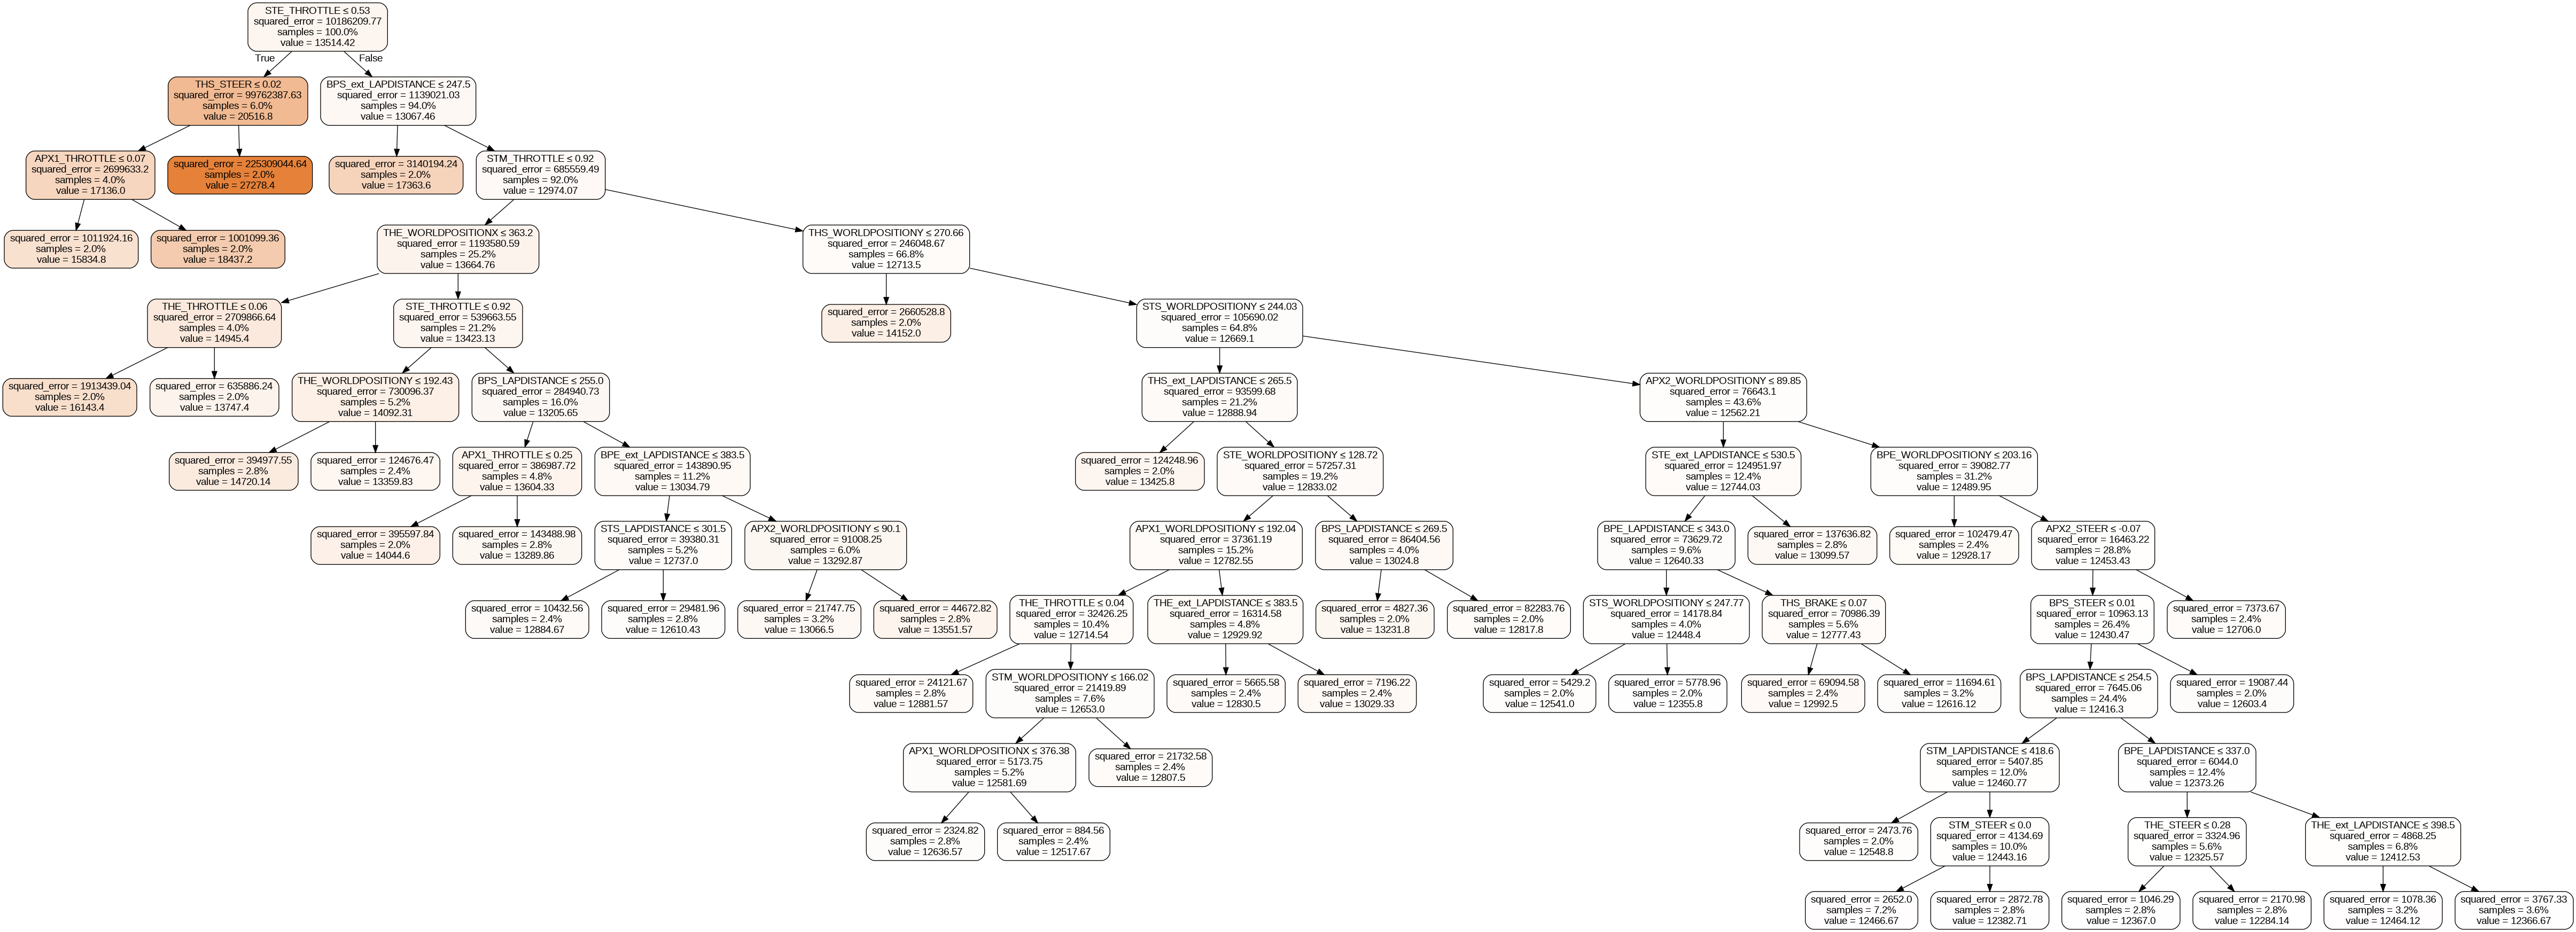


📊 Displaying: complete_tree_complex.png


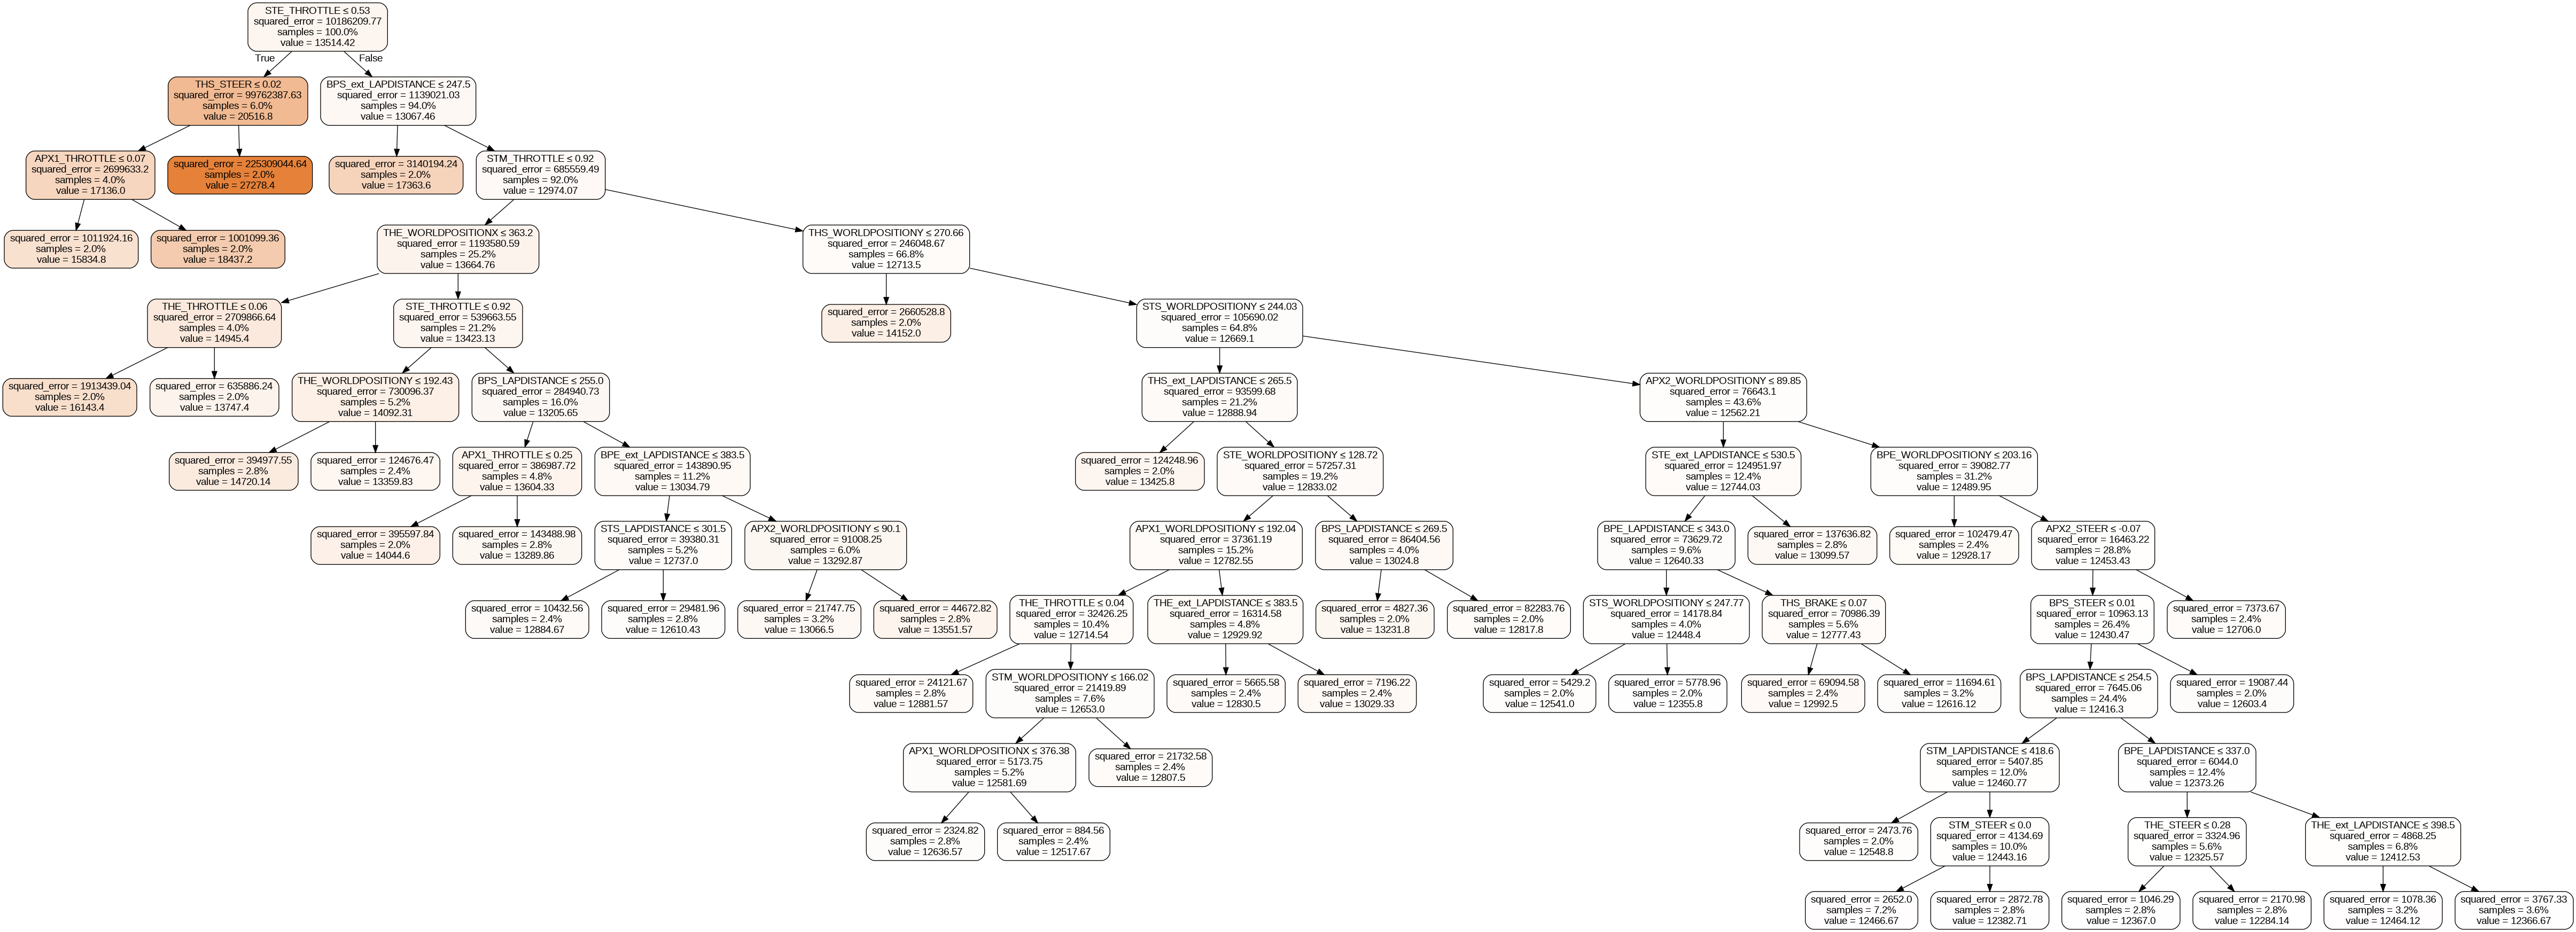


📊 Displaying: complete_tree_gridsearch.png


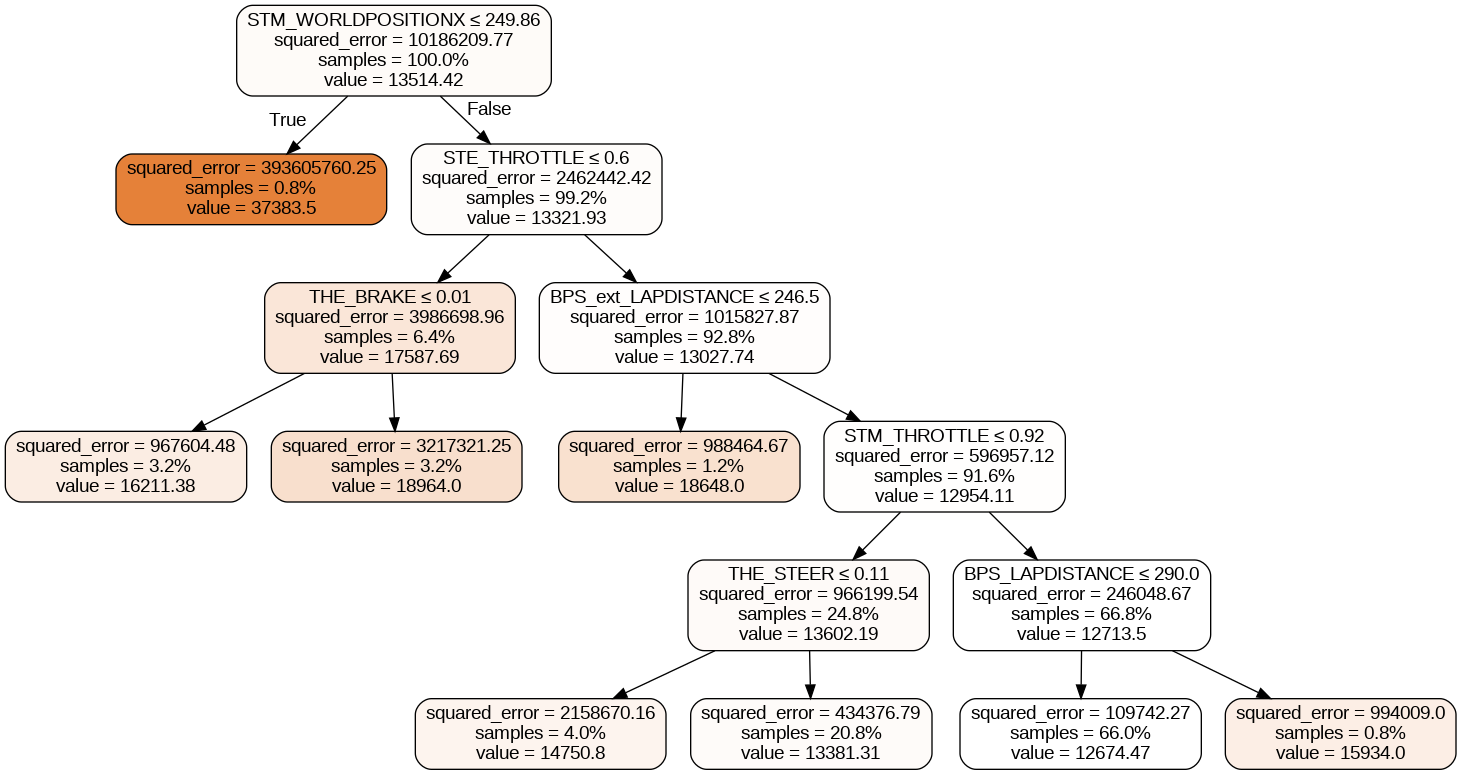


📊 Displaying: complete_tree_original.png


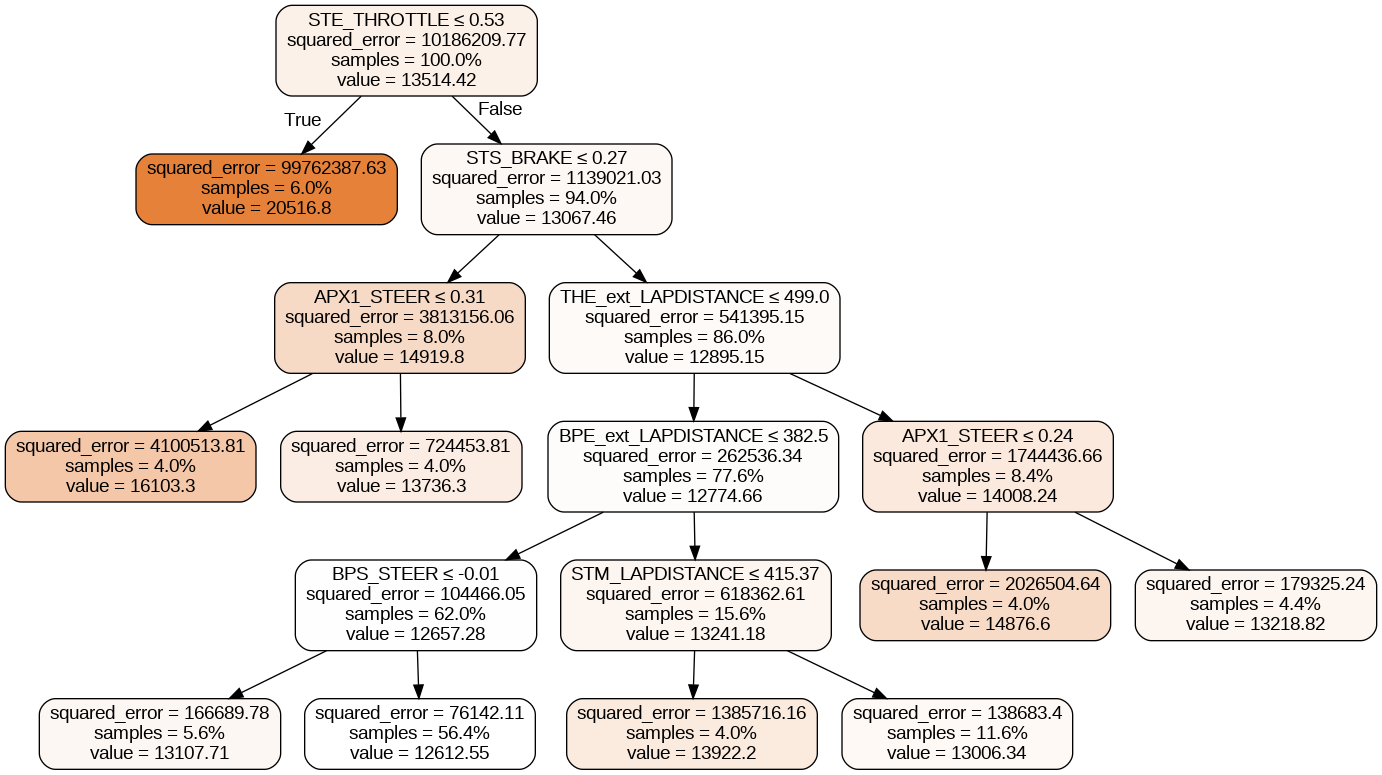

In [ ]:
# === COMPLETE TREE VISUALIZATION (FIXED) ===
print("\n" + "="*60)
print("GENERATING COMPLETE TREE VISUALIZATIONS")
print("="*60)

# Install graphviz for Google Colab
try:
    import graphviz
except:
    print("Installing graphviz...")
    !apt-get install graphviz -y
    !pip install graphviz
    import graphviz

from sklearn.tree import export_graphviz
from IPython.display import Image, display
import os

# Function to create complete tree visualization
def create_complete_tree(model, model_name, feature_names, filename):
    print(f"🌳 Creating complete tree for {model_name}...")

    # Get actual tree depth
    actual_depth = model.tree_.max_depth
    n_nodes = model.tree_.node_count
    n_leaves = model.tree_.n_leaves

    print(f"  Tree stats: Depth={actual_depth}, Nodes={n_nodes}, Leaves={n_leaves}")

    # Export COMPLETE tree (no max_depth limit)
    dot_data = export_graphviz(model,
                               out_file=None,
                               feature_names=feature_names,
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               max_depth=None,  # NO DEPTH LIMIT - shows everything
                               proportion=True,
                               precision=2)  # REMOVED: fontsize parameter

    # Create graph
    graph = graphviz.Source(dot_data)
    graph.format = 'png'

    # Render and save
    try:
        graph.render(filename, cleanup=True, view=False)
        print(f"  ✅ Complete tree saved as {filename}.png")
        return True
    except Exception as e:
        print(f"  ❌ Failed to save {filename}: {e}")
        return False

# Generate complete trees for all models
print("\n📁 Generating complete tree diagrams...")

# 1. Best Model (most important)
create_complete_tree(dt_best, f"BEST_MODEL_{best_model_name}", X.columns, "complete_tree_best")

# 2. Complex Tree
create_complete_tree(dt_complex, "COMPLEX_TREE", X.columns, "complete_tree_complex")

# 3. GridSearch Tree
create_complete_tree(dt_gridsearch, "GRIDSEARCH_TREE", X.columns, "complete_tree_gridsearch")

# 4. Original Tree
create_complete_tree(dt_original, "ORIGINAL_TREE", X.columns, "complete_tree_original")

# === DISPLAY THE COMPLETE TREES ===
print("\n" + "="*50)
print("DISPLAYING COMPLETE TREES")
print("="*50)

# Display all generated tree images
tree_files = [
    "complete_tree_best.png",
    "complete_tree_complex.png",
    "complete_tree_gridsearch.png",
    "complete_tree_original.png"
]

for tree_file in tree_files:
    if os.path.exists(tree_file):
        print(f"\n📊 Displaying: {tree_file}")
        try:
            display(Image(filename=tree_file, width=1200))  # Larger display
        except Exception as e:
            print(f"   Could not display {tree_file}: {e}")
    else:
        print(f"❌ File not found: {tree_file}")

In [ ]:
print("\n=== OPTIMAL DRIVER INPUTS ===")
# Show top features based on importance
feature_importances = your_decision_tree_model.feature_importances_
top_features_idx = np.argsort(feature_importances)[-8:]  # Top 8 most important

for i in top_features_idx:
    feature_name = X.columns[i]
    optimal_value = best_combo[feature_name]
    importance = feature_importances[i]
    print(f"  {feature_name}: {optimal_value:,.4f} (importance: {importance:.3f})")

print(f"\n💡 Analysis complete!")
print(f"   Best model: {best_model_name} (Test R²: {best_model_r2:.4f})")
print(f"   Model uses {non_zero_best} important features")
print(f"   Optimal lap time: {best_pred:,.0f} ms")



=== OPTIMAL DRIVER INPUTS ===
  THS_WORLDPOSITIONY: 332.5255 (importance: 0.008)
  THE_THROTTLE: 0.1679 (importance: 0.011)
  APX1_THROTTLE: 0.0487 (importance: 0.014)
  THE_WORLDPOSITIONX: 349.3661 (importance: 0.014)
  STM_THROTTLE: 0.9736 (importance: 0.031)
  BPS_ext_LAPDISTANCE: 306.1946 (importance: 0.069)
  THS_STEER: -0.0948 (importance: 0.253)
  STE_THROTTLE: 0.6519 (importance: 0.582)

💡 Analysis complete!
   Best model: Complex_Tree (Test R²: -0.2608)
   Model uses 29 important features
   Optimal lap time: 12,284 ms


In [ ]:
# Save the best combination for reference
print(f"\nVariables available for further analysis:")
print(f"  dt_original, dt_complex, dt_gridsearch = all trained models")
print(f"  dt_best = best performing model ({best_model_name})")
print(f"  best_combo = optimal feature values")
print(f"  best_pred  = {best_pred:,.0f} ms")


Variables available for further analysis:
  dt_original, dt_complex, dt_gridsearch = all trained models
  dt_best = best performing model (Complex_Tree)
  best_combo = optimal feature values
  best_pred  = 12,284 ms
